1500


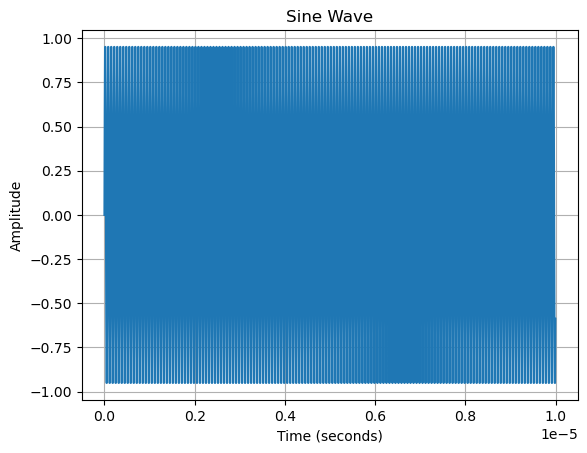

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import math

carrier_freq = 15e6  # 15MHz

nyguist_factor = 2  # The Nyquist theorem states that the sampling frequency must be at least twice the signal frequency

sampling_freq = carrier_freq * (nyguist_factor * 5)
sampling_period = 1 / sampling_freq

duration = 10e-6  # 1 microsecond makes sense use, unless stated otherwise
carrier_amplitude = 1  # Unless stated otherwise, the amplitude of the carrier wave is 1

time = np.arange(0, duration, sampling_period)

carrier_sine_wave = carrier_amplitude * np.sin(2 * math.pi * carrier_freq * time)

print(len(carrier_sine_wave))

plt.plot(time, carrier_sine_wave)
plt.title("Sine Wave")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True, which="both")
plt.show()

CNSM3 Data Communications
Example lab Assessment


Part 1 Generate a carrier sine wave
A data communication system is using Binary Amplitude Shift Keying (BASK) to send data at 500kbps.  Generate a suitable carrier sine wave.  The carrier sine wave should have a frequency of 15MHz.

1. What sampling frequency did you use for the sine wave?
2. How many cycles of the sine wave are there per bit of data?
3. What is the period of the sine wave?
4. Plot the sine wave and paste a copy below.  Make sure the axes of your plot are properly labelled.

 
Part 2 Modulate the carrier sine wave
The data communications system is transmitting the following binary sequence.
10011010010110001110
Modulate the carrier using BASK to carry the data sequence.  

Q5. What is the total duration of the modulated carrier signal?



Q6. How many data points are in the array representing the modulated carrier signal?

 

Q7. Plot the modulated sine wave and paste a copy below.  Make sure the axes of your plot are properly labelled.





20


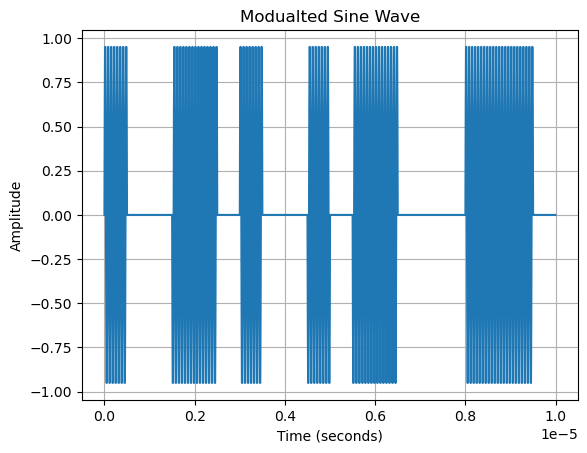

In [50]:
data = np.array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0])

print(len(data))

# comes to 15 in Marks mod, was 75 in the original code


upsample_rate = int(len(carrier_sine_wave) / len(data))
# we need to upsample the data stream as we can only multiply arrays of the same length


data_upsampled = []


for index in range(0, len(data), 1):

    if data[index] == 0:

        data_upsampled.append(np.zeros(upsample_rate))

    else:
        data_upsampled.append(np.ones(upsample_rate))



data_upsampled = np.hstack(data_upsampled)



modulated_signal = carrier_sine_wave * data_upsampled


plt.plot(time, modulated_signal)
plt.title("Modualted Sine Wave")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True, which="both")
plt.show()

## Part 3 Add noise to the modulated sine wave

Add noise to the modulated sine wave so that the SNR = 6dB

1. What is the amplitude of your noise?
2. Plot the noisy modulated sine wave and paste a copy below.  Make sure the axes of your plot are properly labelled.

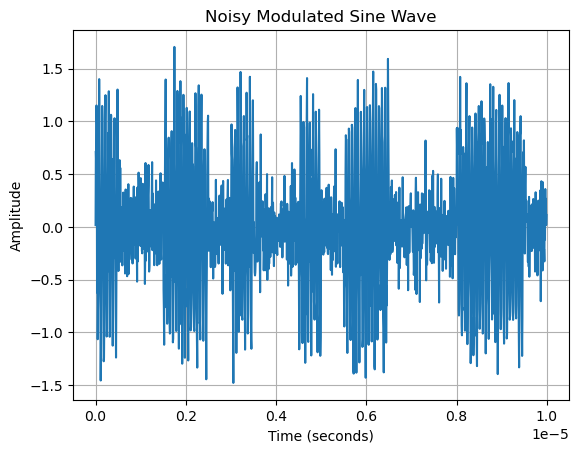

In [51]:
noise_Db = 6  # From the question, the noise is 6dB

noise_ratio = pow(10, (noise_Db / 10))


noise_amplitude = carrier_amplitude / noise_ratio
noise_signal = np.random.normal(0, noise_amplitude, size=len(modulated_signal))
noisy_modulated_signal = modulated_signal + noise_signal


plt.plot(time, noisy_modulated_signal)
plt.title("Noisy Modulated Sine Wave")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True, which="both")
plt.show()

3. Measure the signal power in the noisy modulated signal for the first bit and the second bit.  Fill in the values below
   - Noise power bit 1 (1)
   - Noise power bit 2 (0)

In [52]:
bit_one_data = noisy_modulated_signal[0 : upsample_rate - 1]
# You are picking the first 75 numbers because it was the upsample_rate
bit_two_data = noisy_modulated_signal[upsample_rate : upsample_rate * 2 - 1]
# Next 75 numbers

bit_one_power = np.mean(np.abs(bit_one_data**2))
bit_two_power = np.mean(np.abs(bit_two_data**2))
print(bit_one_power)
print(bit_two_power)

0.606103488407007
0.06661921206139448
